In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
iris = pd.read_csv('iris.csv',index_col=0)

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


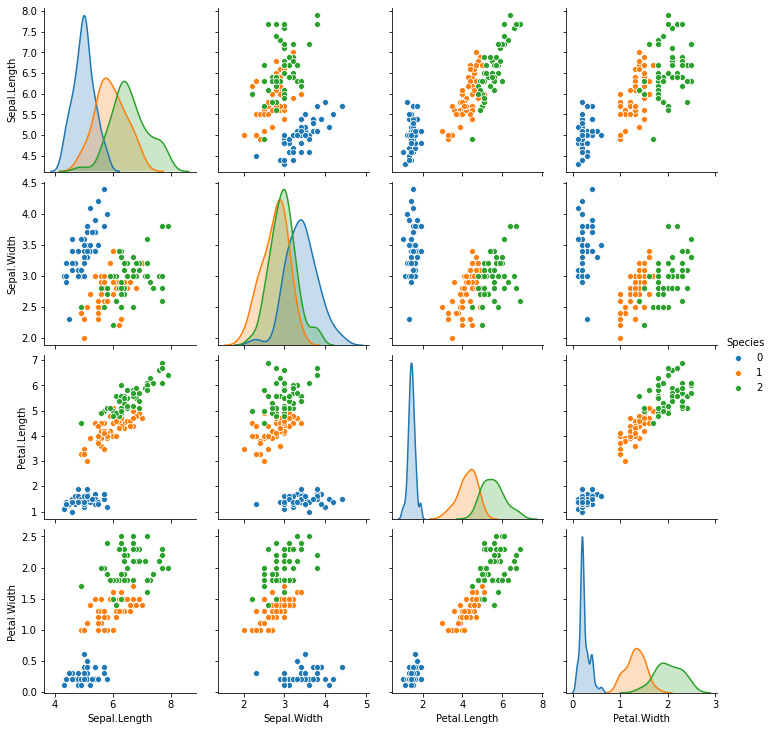

In [7]:
import seaborn as sns
sns.pairplot(iris,hue='Species')

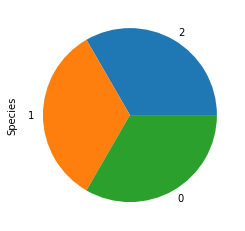

2    50
1    50
0    50
Name: Species, dtype: int64


In [8]:
iris['Species'].value_counts().plot.pie()
plt.show()
print(iris['Species'].value_counts())

In [9]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [10]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [11]:
y

1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [12]:
iris['Species'].unique()

array([0, 1, 2])

In [13]:
iris.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [14]:
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

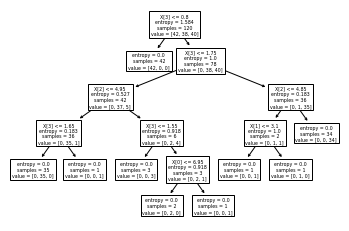

In [17]:
#PLot the decision tree
tree.plot_tree(model);

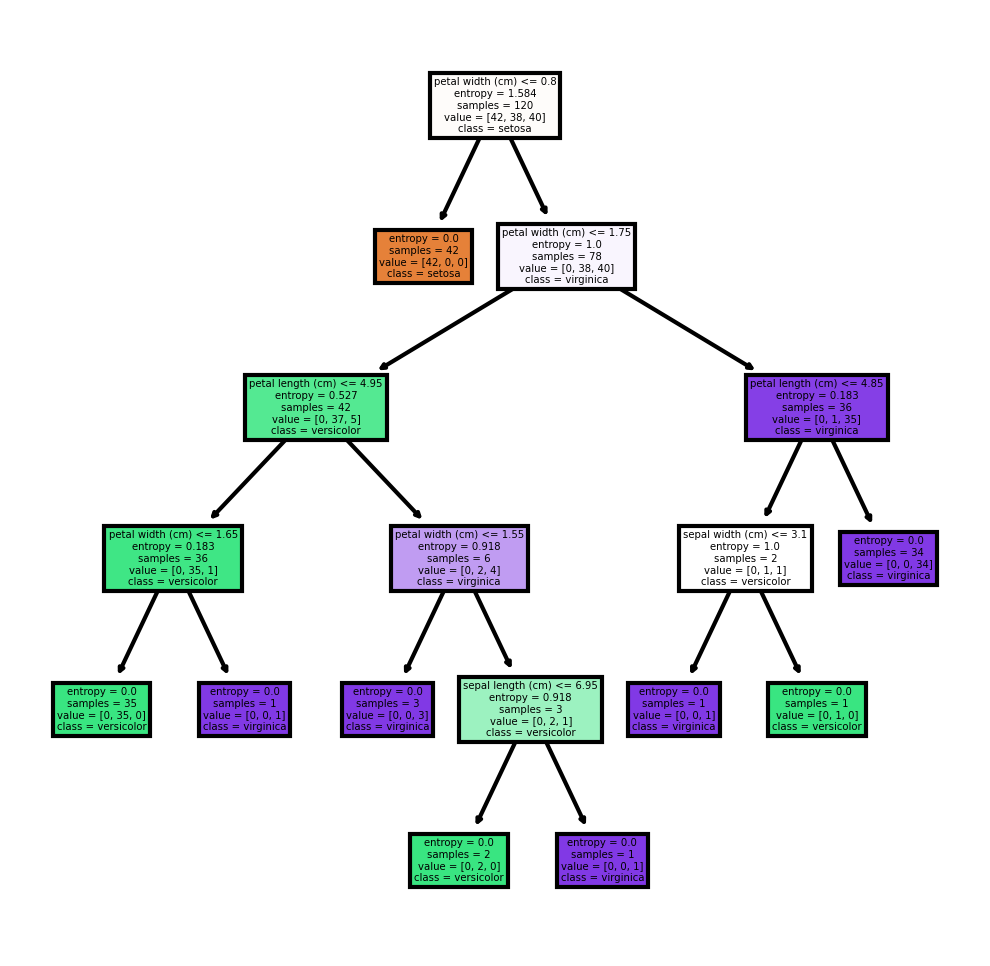

In [18]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [19]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    12
2    10
0     8
dtype: int64

In [20]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [21]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [22]:
# Accuracy 
np.mean(preds==y_test)

1.0

# Bagging

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)

In [26]:
model.fit(x_train, y_train);

In [27]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [28]:
accuracy_score(y_test,model.predict(x_test))

1.0

# Ada boost

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
num_trees = 30
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)

In [31]:
model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [32]:
accuracy_score(y_test,model.predict(x_test))

1.0

In [33]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

# XG Boost

In [34]:
from xgboost import XGBClassifier

In [35]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred = model.predict(x_test)
predictions = [value for value in y_pred]

In [37]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [38]:
predictions

[0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1]